# Classificaton and Hypothesis Testing Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve
)

# Scale data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")


## Data Overview

- Observations
- Sanity checks

In [2]:
# Loading the dataset 
data = pd.read_csv('data/potential_customers_data.csv')

In [3]:
# Display first 5 rows of the Dataframe
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [4]:
# Show the dimension of the Dataframe
data.shape

(4612, 15)

In [5]:
# Show the info and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [6]:
# Check unique values in each column
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

In [7]:
# Create copy of DataFrame
extraa_learn_df = data.copy()


In [8]:
# Display first 5 rows of copied DataFrame w/ dropped ID column
extraa_learn_df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [9]:
# Create numerical columns
num_cols = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

# Create categorical columns
cat_cols = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [10]:
# Check for missing values
round(extraa_learn_df.isnull().sum() / extraa_learn_df.isnull().count() * 100, 2)

ID                       0.0
age                      0.0
current_occupation       0.0
first_interaction        0.0
profile_completed        0.0
website_visits           0.0
time_spent_on_website    0.0
page_views_per_visit     0.0
last_activity            0.0
print_media_type1        0.0
print_media_type2        0.0
digital_media            0.0
educational_channels     0.0
referral                 0.0
status                   0.0
dtype: float64

In [11]:
# Double-check for missing value using a different method
extraa_learn_df.isna().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

In [12]:
# Check for duplicates
extraa_learn_df.duplicated().sum()

0

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [13]:
# Drop ID Column
extraa_learn_df = extraa_learn_df.drop(['ID'], axis=1)

In [14]:
# Check summary statistics for numerical variables
extraa_learn_df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434


In [15]:
# Check summary statistics for categorical variables
extraa_learn_df.describe(include='object').T

,count,unique,top,freq
current_occupation,4612,3,Professional,2616
first_interaction,4612,2,Website,2542
profile_completed,4612,3,High,2264
last_activity,4612,3,Email Activity,2278
print_media_type1,4612,2,No,4115
print_media_type2,4612,2,No,4379
digital_media,4612,2,No,4085
educational_channels,4612,2,No,3907
referral,4612,2,No,4519


#### **Univariate analysis**

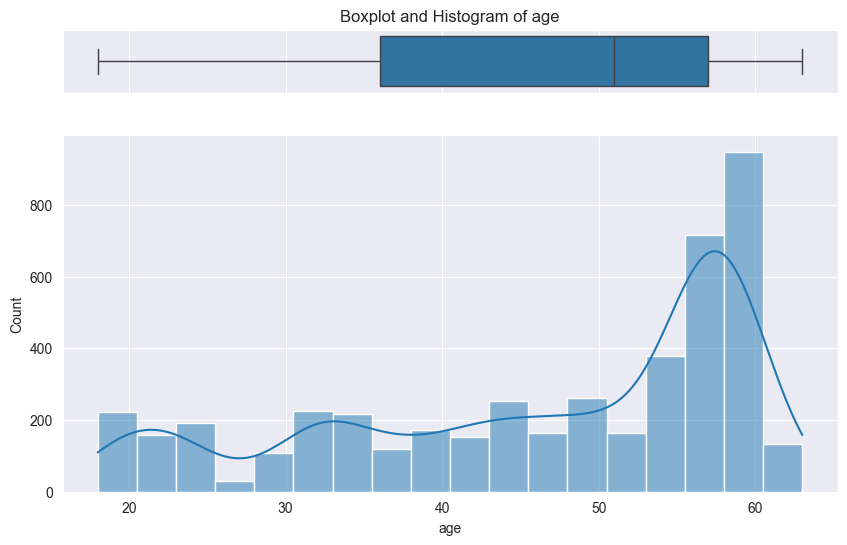

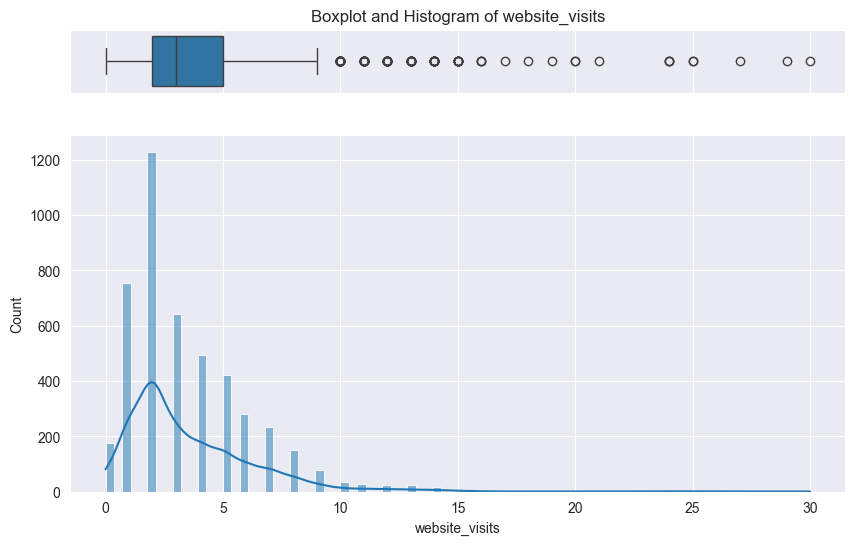

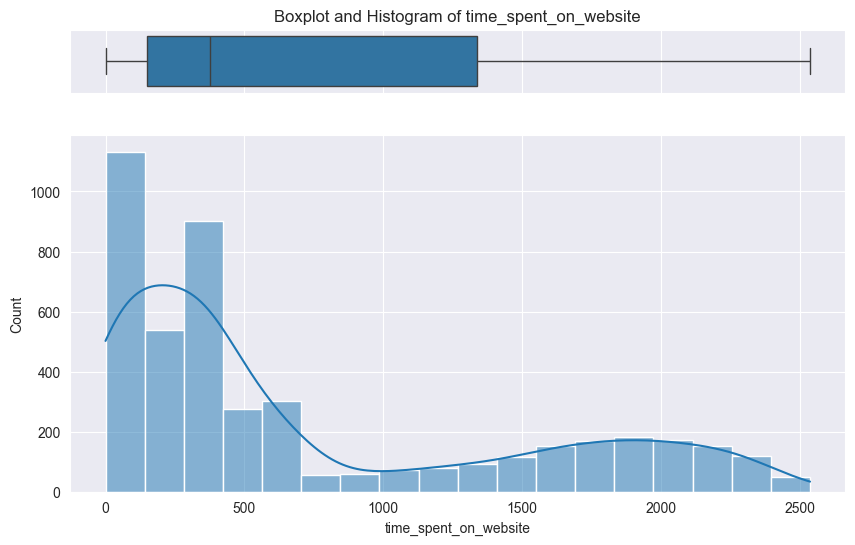

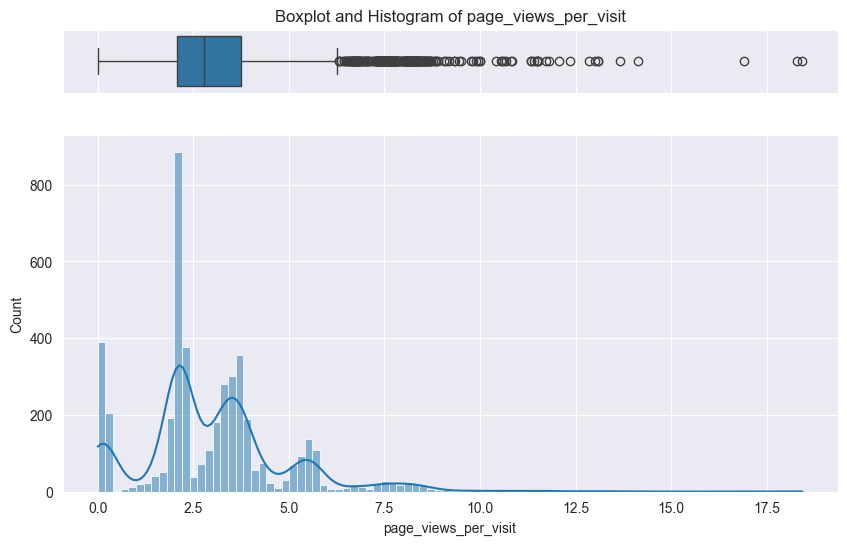

In [16]:
# Set the style for the plots
sns.set_style("darkgrid")

# Loop through each numerical column
for col in num_cols:
    # Create subplots with shared x-axis and height ratio adjustment
    f, (ax_box, ax_hist) = plt.subplots(
        2, 
        sharex=True, 
        gridspec_kw={'height_ratios': (.15, .85)}, 
        figsize=(10, 6)
    )

    # Add a boxplot and a histogram with KDE for each numerical column
    sns.boxplot(data=extraa_learn_df, x=col, ax=ax_box)  # Replace extraa_learn_df with your dataframe
    sns.histplot(data=extraa_learn_df, x=col, kde=True, ax=ax_hist)
    
    # Set labels and titles
    ax_box.set(xlabel='')  # Remove x-axis label from the boxplot for clarity
    ax_hist.set(xlabel=col)
    ax_box.set_title(f'Boxplot and Histogram of {col}')
    
    # Show the plot
    plt.show()

## **Bivariate Analysis**

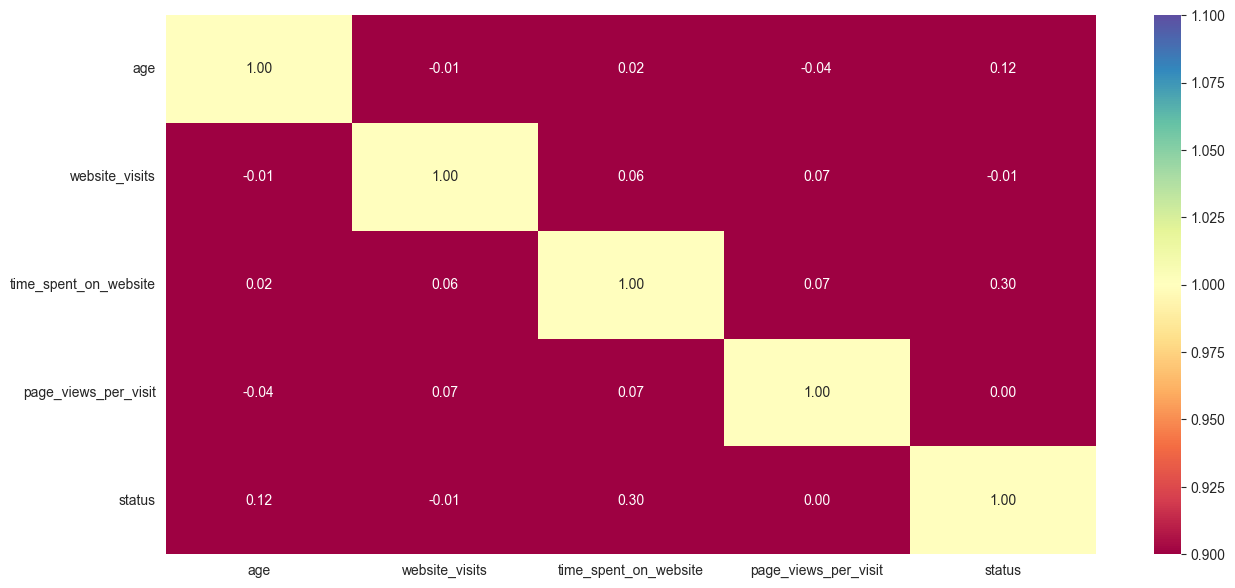

In [17]:
numeric_data = extraa_learn_df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(15, 7))
sns.heatmap(numeric_data.corr(), annot=True, vmin=1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [18]:
# Printing the % sub categories
for i in extraa_learn_df.describe(include=['object']).columns:
    print("Unique values in", i, "are:")
    print(extraa_learn_df[i].value_counts())
    print("-" * 50)

Unique values in current_occupation are:
current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
--------------------------------------------------
Unique values in first_interaction are:
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
--------------------------------------------------
Unique values in profile_completed are:
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
--------------------------------------------------
Unique values in last_activity are:
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
--------------------------------------------------
Unique values in print_media_type1 are:
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
--------------------------------------------------
Unique values in print_media_type2 are:
print_media_type2
No     4379
Yes     233
Name

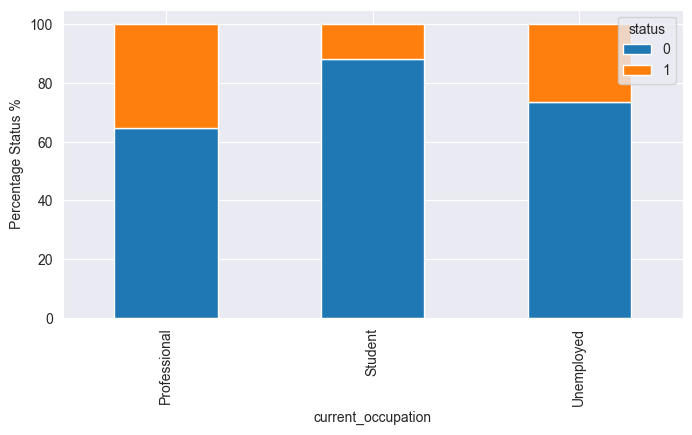

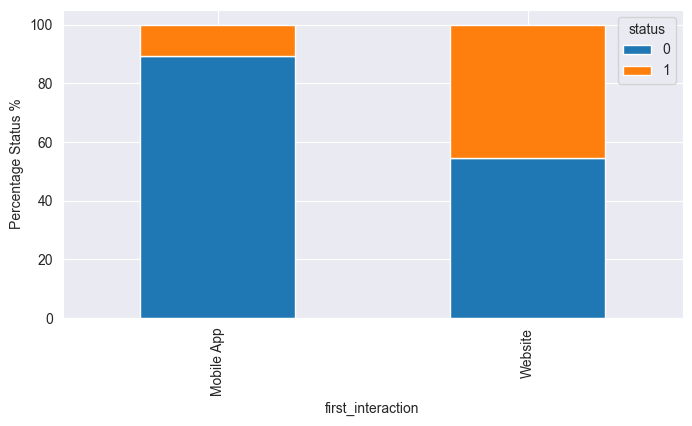

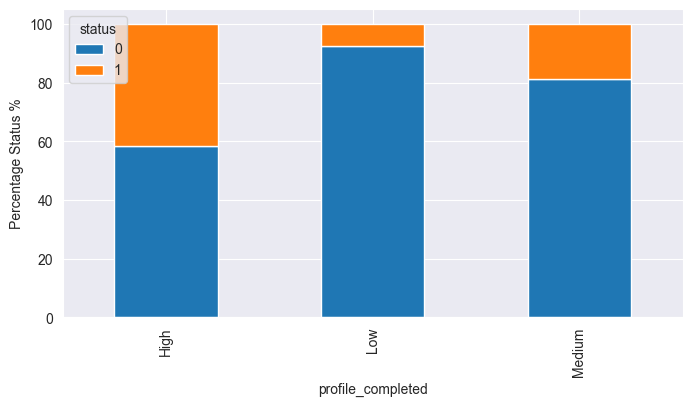

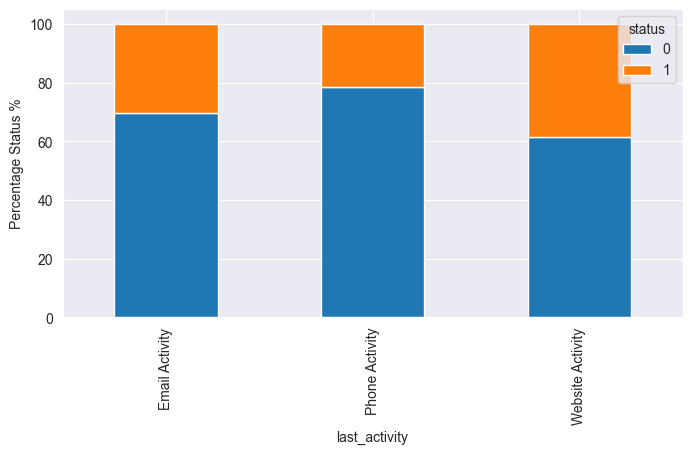

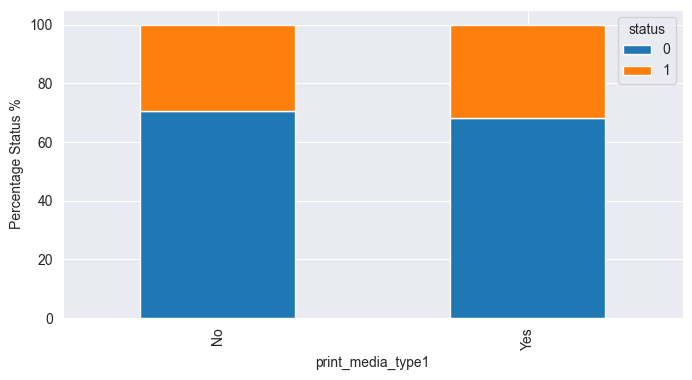

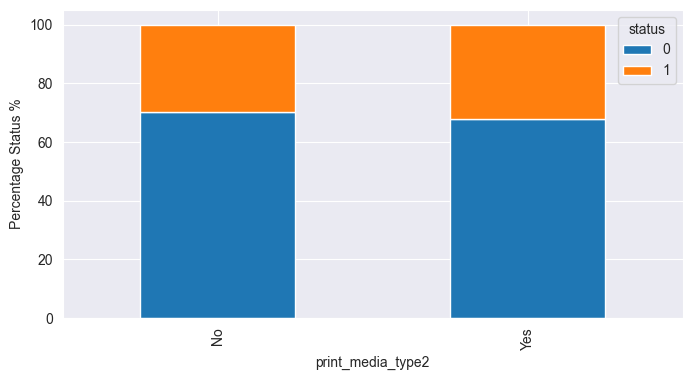

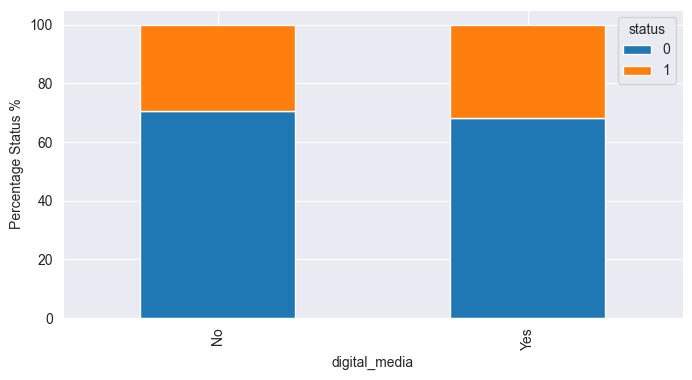

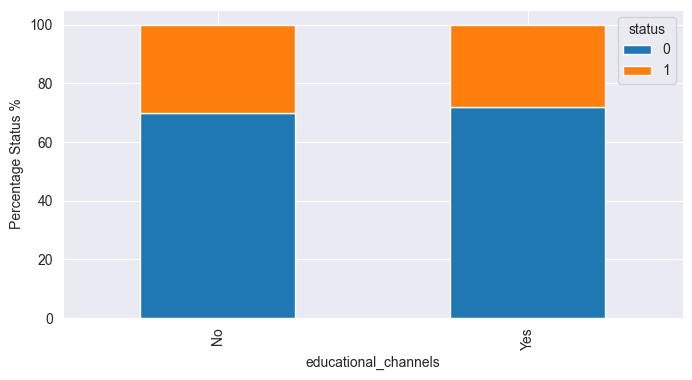

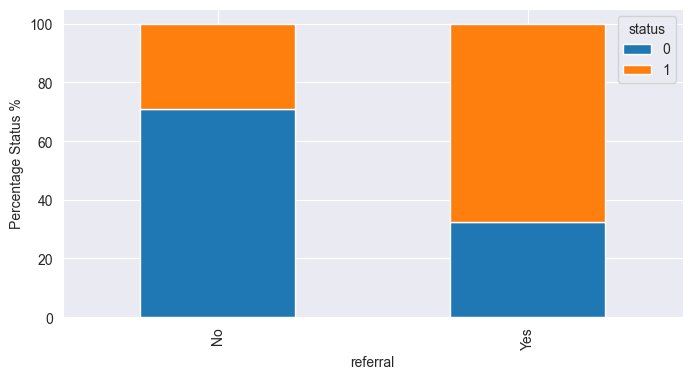

In [19]:
for i in cat_cols:
        (pd.crosstab(extraa_learn_df[i],extraa_learn_df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage Status %')

## Building a Decision Tree model

In [20]:
# Separate independent variable (x) and the dependent variable (y)
X = extraa_learn_df.drop(['status'], axis=1)
y = extraa_learn_df['status']

In [21]:
# Splitting the data into 70% train and 30% test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [22]:
# Encoding categorical variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_test.shape)

(3228, 16) (1384, 16)


In [23]:
# Display training data
X_train.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
389,57,1,582,2.197,False,False,False,False,False,False,False,False,False,False,True,False
1162,35,2,1937,5.111,False,True,True,False,True,False,False,False,False,True,False,False
1057,53,5,1554,2.123,False,True,True,False,True,False,False,False,False,False,True,False
436,52,7,15,4.382,False,False,True,False,False,False,False,False,False,False,False,False
946,57,0,0,0.000,False,False,True,False,False,False,False,True,False,False,False,False


In [24]:
# Create metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [25]:
# Building decision tree model
model_dt = DecisionTreeClassifier(random_state=1, max_depth=8)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2264
           1       0.80      0.87      0.83       964

    accuracy                           0.90      3228
   macro avg       0.87      0.89      0.88      3228
weighted avg       0.90      0.90      0.90      3228



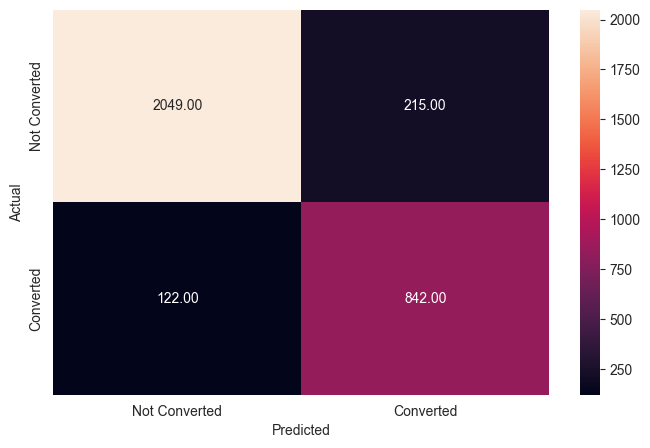

In [26]:
# Check performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       971
           1       0.72      0.79      0.75       413

    accuracy                           0.85      1384
   macro avg       0.81      0.83      0.82      1384
weighted avg       0.85      0.85      0.85      1384



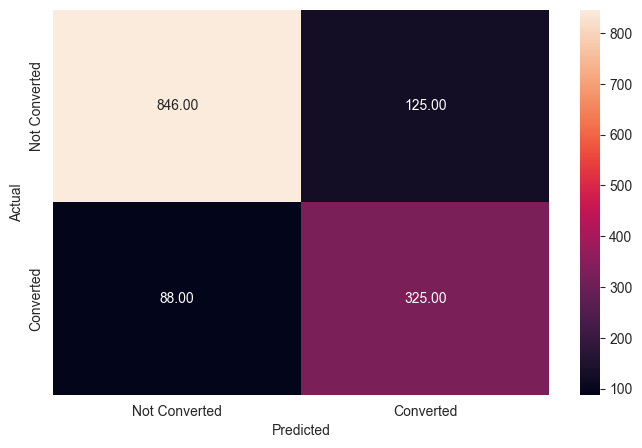

In [27]:
# Check performance on the test dataset
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)


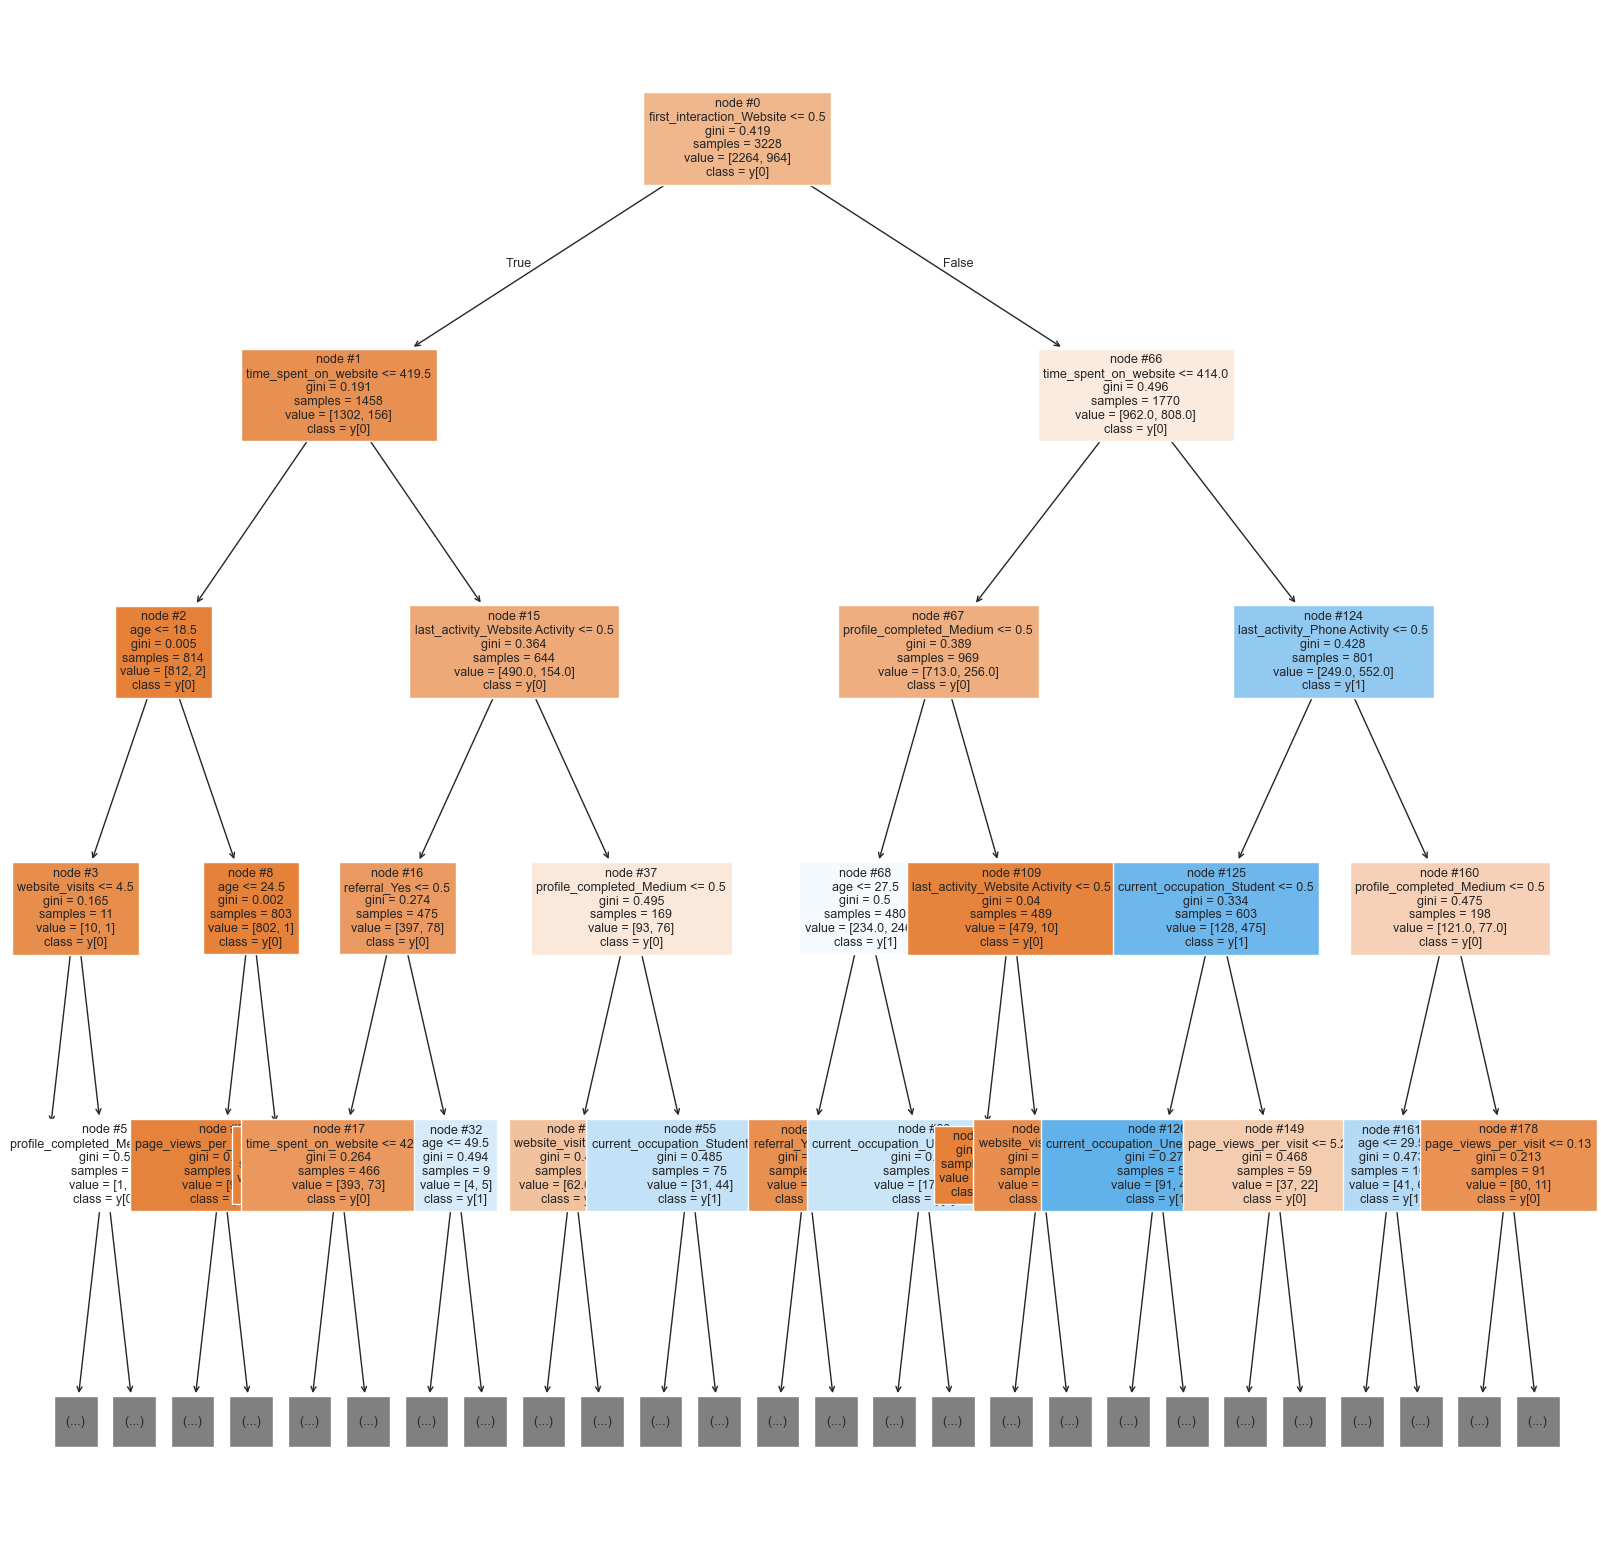

In [28]:
# Visualize decision tree and observe decision rules
features = list(X_train.columns)

plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(model_dt,feature_names=features,max_depth =4, filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

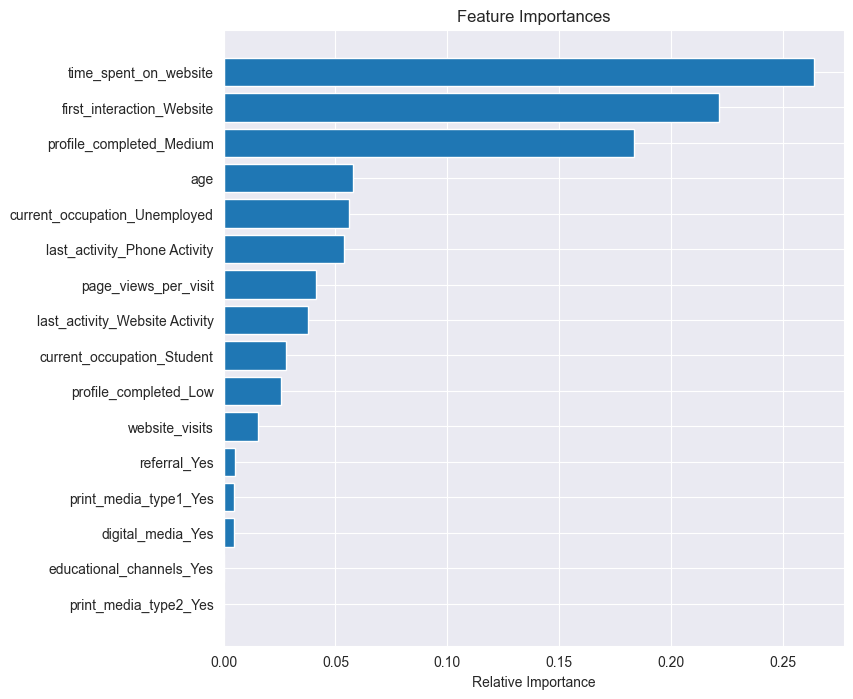

In [29]:
# Check feature importance in the decision tree
feature_names = list(X_train.columns)
importances = model_dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Do we need to prune the tree?

In [30]:
# Pruning to reduce misclassifications and overfitting
model_dt = DecisionTreeClassifier(random_state=1, max_depth=5, min_samples_leaf=20)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, random_state=1)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2264
           1       0.77      0.76      0.76       964

    accuracy                           0.86      3228
   macro avg       0.83      0.83      0.83      3228
weighted avg       0.86      0.86      0.86      3228



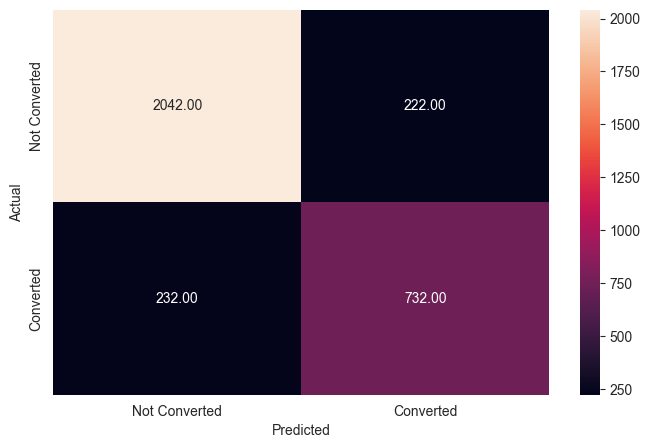

In [31]:
# Check performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       971
           1       0.76      0.74      0.75       413

    accuracy                           0.85      1384
   macro avg       0.82      0.82      0.82      1384
weighted avg       0.85      0.85      0.85      1384



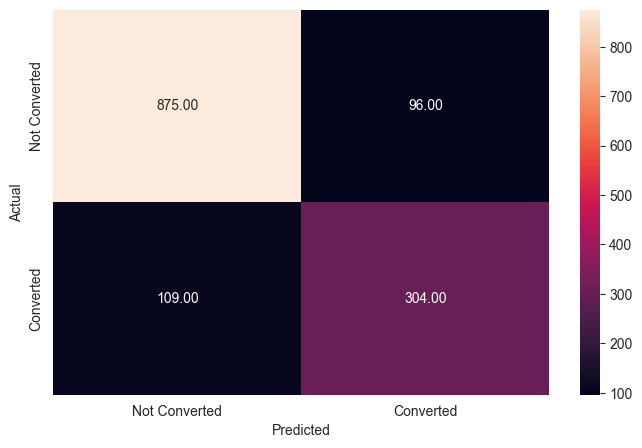

In [32]:
# Check performance on the test dataset
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

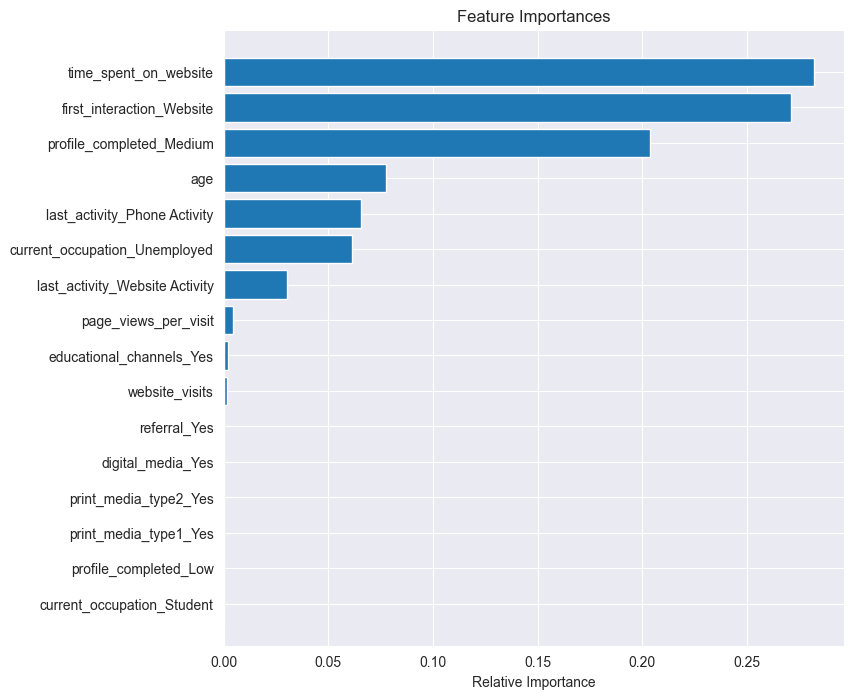

In [33]:
# Check feature importance in the decision tree
feature_names = list(X_train.columns)
importances = model_dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Building a Random Forest model

In [34]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



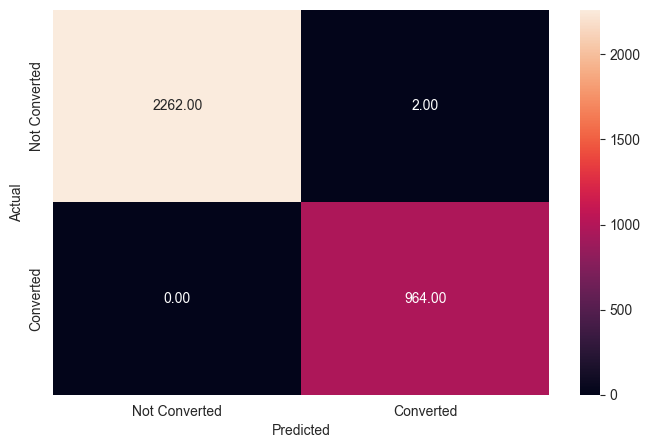

In [35]:
# Check the performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train_rf)


              precision    recall  f1-score   support

           0       0.89      0.91      0.90       971
           1       0.78      0.73      0.76       413

    accuracy                           0.86      1384
   macro avg       0.83      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



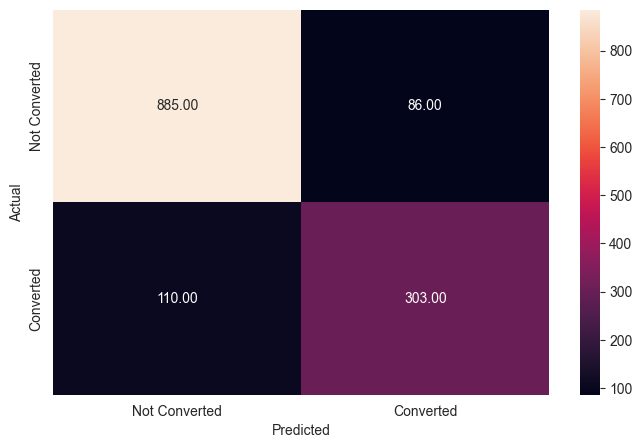

In [36]:
# Check the performance on the test data
rf_pred_test_rf = rf_estimator.predict(X_test)
metrics_score(y_test, rf_pred_test_rf)

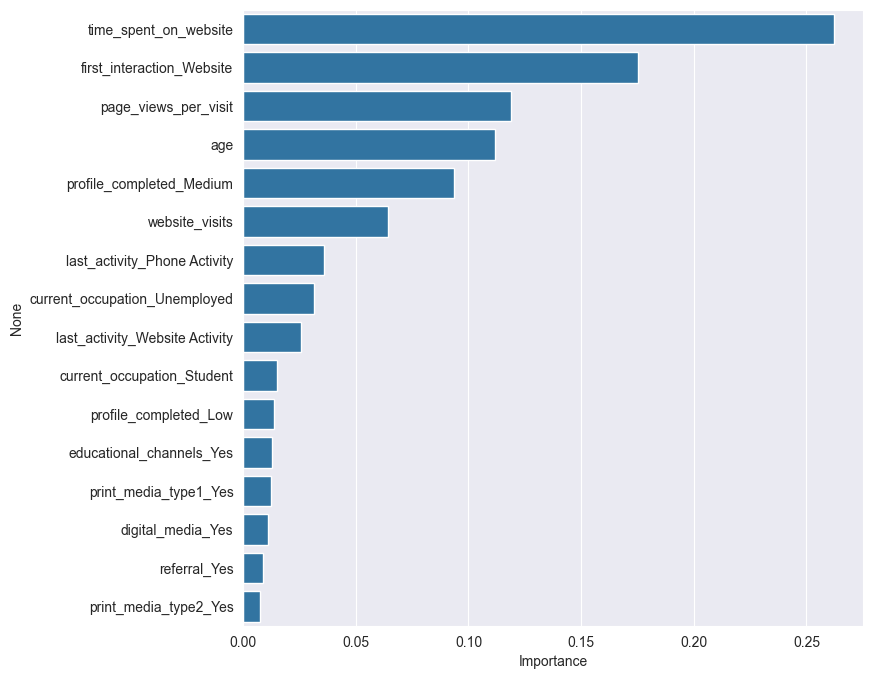

In [37]:
# Check feature importance of the Random Forest
importances = rf_estimator.feature_importances_
columns = X_train.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (8, 8))
sns.barplot(x = importance_df.Importance, y = importance_df.index)
plt.show()


## Do we need to prune the tree?

In [38]:
# Increase the minimum samples per leaf to reduce overfitting
rf_estimator = RandomForestClassifier(random_state=1, n_estimators=100, min_samples_leaf=5)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2264
           1       0.88      0.81      0.85       964

    accuracy                           0.91      3228
   macro avg       0.90      0.88      0.89      3228
weighted avg       0.91      0.91      0.91      3228



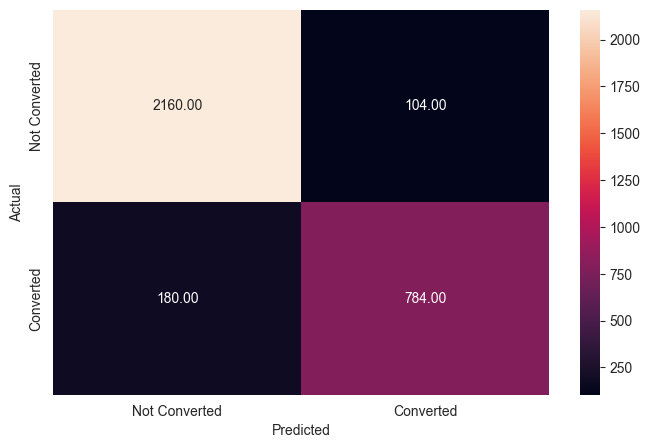

In [39]:
# Check the performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       971
           1       0.80      0.74      0.77       413

    accuracy                           0.87      1384
   macro avg       0.84      0.83      0.84      1384
weighted avg       0.86      0.87      0.86      1384



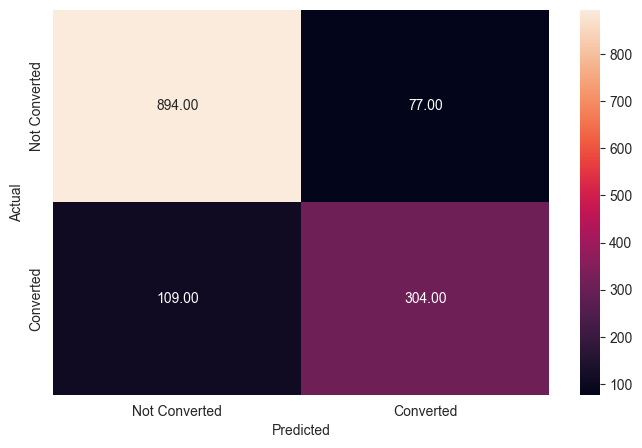

In [40]:
# Check the performance on the test data
rf_pred_test_rf = rf_estimator.predict(X_test)
metrics_score(y_test, rf_pred_test_rf)

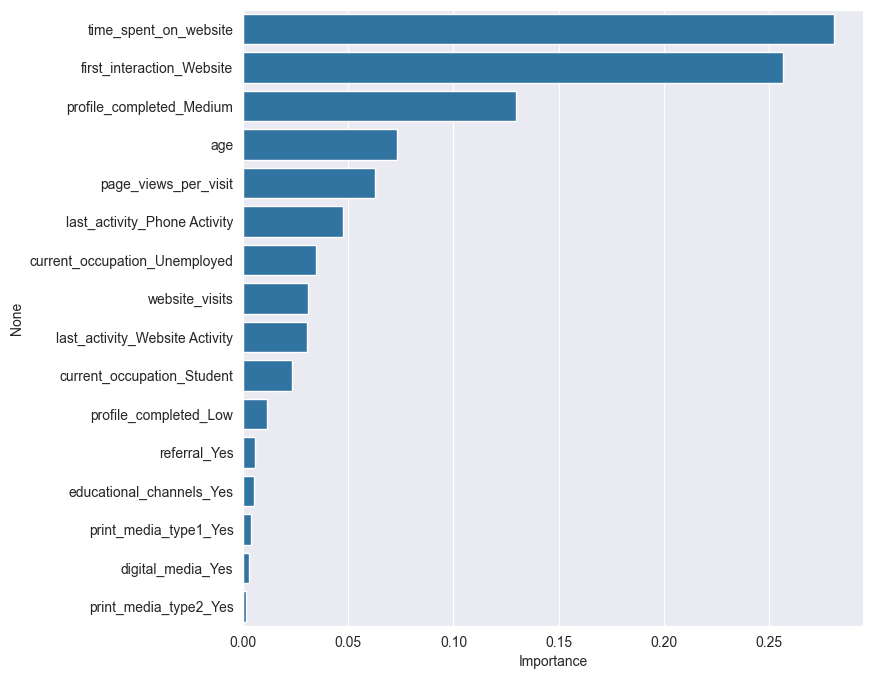

In [41]:
# Check feature importance of the Random Forest
importances = rf_estimator.feature_importances_
columns = X_train.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (8, 8))
sns.barplot(x = importance_df.Importance, y = importance_df.index)
plt.show()


## Actionable Insights and Recommendations